# Analysis for the experiments on the SINC scenario

In [34]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from itertools import combinations

In [35]:
# Settings
fileName = "resultsSINC.csv"
orderingStrategyPMedici = "IN_ORDER_SIZE_DESC"

In [36]:
# Load the file into a pandas dataframe
df = pd.read_csv(fileName, names=['Generator','ModelName','PercentageOfOldTsKept','TSSize','TSTime','Strength','Ordering', ''], header=0, index_col=False)
# Set Ordering to empty string where it is NaN
df['Ordering'].fillna('', inplace=True)

## Group all executions

In [37]:
# Group data in df by Generator, ModelName, PercentageOfOldTsKept, Strength, and Ordering. For the TSSize and TS time, take the mean
df = df.groupby(['Generator','ModelName','PercentageOfOldTsKept','Strength','Ordering']).agg({'TSSize':'mean', 'TSTime':'mean'}).reset_index()
# Remove from df all the lines where generator is pMEDICI or pMEDICI+ but Ordering is not equal to orderingStrategyPMedici
dfFiltered = df[~(df['Generator'].str.contains('pMEDICI')) | (df['Generator'].str.contains('pMEDICI') & (df['Ordering'] == orderingStrategyPMedici))]
# Remove rows with strength 2
dfFiltered = dfFiltered[dfFiltered['Strength'] != 2]

In [38]:
# Count and print the number of timeouts per Generator
print(dfFiltered[dfFiltered['TSTime'] == -1].groupby(['Generator']).agg({'TSTime':'count'}))

              TSTime
Generator           
ACTS               7
ACTS w SEEDS       7
PICT              11
PICT w SEEDS      11
pMEDICI           12
pMEDICI+          12


In [39]:
# Set all timeouts (TSTime = -1) to TSTime = 300001 and with Size = MAX Size
dfFiltered.loc[dfFiltered['TSTime'] == -1, 'TSSize'] = 100000
dfFiltered.loc[dfFiltered['TSTime'] == -1, 'TSTime'] = 301000

In [40]:

# Print the average time and size for each Generator
# print(dfFiltered.groupby(['Generator']).agg({'TSSize':'mean', 'TSTime':'mean'}))
print(dfFiltered.groupby(['Generator']).agg({'TSTime':'mean'}))
print(dfFiltered[~dfFiltered['ModelName'].isin(dfFiltered[dfFiltered['TSTime'] == 301000]['ModelName'])].groupby(['Generator']).agg({'TSSize':'mean'}))

                 TSTime
Generator              
ACTS          46046.500
ACTS w SEEDS  46070.556
PICT          83381.028
PICT w SEEDS  82290.972
pMEDICI       91942.172
pMEDICI+      88655.336
                   TSSize
Generator                
ACTS           867.000000
ACTS w SEEDS   867.000000
PICT           918.916667
PICT w SEEDS   919.888889
pMEDICI       1162.833333
pMEDICI+      1135.977778


## Time analysis

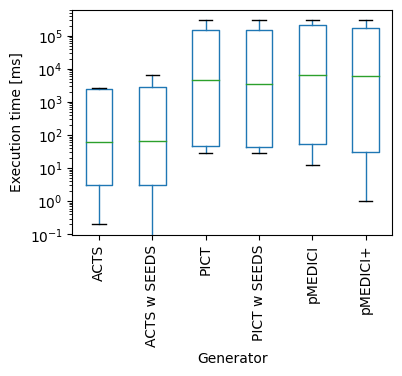

In [41]:
# Extract the execution time of different generators
dfExecutionTime = dfFiltered[['Generator','TSTime']]

# Boxplot the execution time of different generators and remove the outliers
ax = dfExecutionTime.boxplot(by='Generator', showfliers=False, grid=False, rot=90)
ax.set_yscale('log')
ax.set_ylabel('Execution time [ms]')
ax.set_xlabel('Generator')
ax.set_title('')
plt.suptitle('')
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(4, 3)
# Export the figure in PDF
plt.savefig("pictures/SINC_TS_Time.pdf", bbox_inches='tight')

In [42]:
# Execute a Wilcoxon Signed-Rank test among each couple of Generators investigating the TSTime
generators = dfExecutionTime['Generator'].unique()
for generator1, generator2 in combinations(generators, 2):
    print(generator1 + " VS " + generator2 + ":\n", wilcoxon(dfExecutionTime[dfExecutionTime['Generator'] == generator1]['TSTime'], dfExecutionTime[dfExecutionTime['Generator'] == generator2]['TSTime']))

ACTS VS ACTS w SEEDS:
 WilcoxonResult(statistic=271.0, pvalue=0.061694078206530716)
ACTS VS PICT:
 WilcoxonResult(statistic=73.0, pvalue=1.365460984797389e-06)
ACTS VS PICT w SEEDS:
 WilcoxonResult(statistic=75.0, pvalue=1.5407625240149069e-06)
ACTS VS pMEDICI:
 WilcoxonResult(statistic=129.0, pvalue=3.269682875940137e-05)
ACTS VS pMEDICI+:
 WilcoxonResult(statistic=145.0, pvalue=7.47665616607117e-05)
ACTS w SEEDS VS PICT:
 WilcoxonResult(statistic=73.0, pvalue=1.3648574260587254e-06)
ACTS w SEEDS VS PICT w SEEDS:
 WilcoxonResult(statistic=75.0, pvalue=1.5410998768262395e-06)
ACTS w SEEDS VS pMEDICI:
 WilcoxonResult(statistic=129.0, pvalue=3.270224085929715e-05)
ACTS w SEEDS VS pMEDICI+:
 WilcoxonResult(statistic=146.0, pvalue=7.863931395063276e-05)
PICT VS PICT w SEEDS:
 WilcoxonResult(statistic=105.0, pvalue=6.971063689029313e-05)
PICT VS pMEDICI:
 WilcoxonResult(statistic=399.0, pvalue=0.6831322904916168)
PICT VS pMEDICI+:
 WilcoxonResult(statistic=415.0, pvalue=0.840809001483488)
P

c:\Users\Andrea_PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


## Size analysis

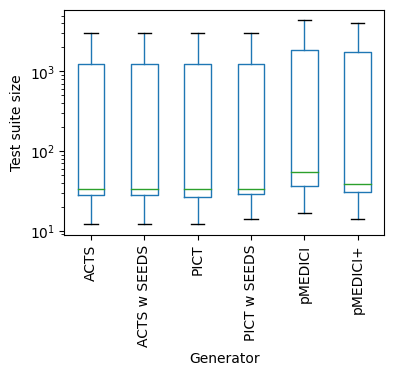

In [43]:
# Extract the TS Size of different generators
dfTSSize = dfFiltered[~dfFiltered['ModelName'].isin(dfFiltered[dfFiltered['TSTime'] == 301000]['ModelName'])][['Generator','TSSize']]

# Boxplot the TS Size of different generators and remove the outliers
ax = dfTSSize.boxplot(by='Generator', showfliers=False, grid=False, rot=90)
ax.set_yscale('log')
ax.set_ylabel('Test suite size')
ax.set_xlabel('Generator')
ax.set_title('')
plt.suptitle('')
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(4, 3)
# Export the figure in PDF
plt.savefig("pictures/SINC_TS_Size.pdf", bbox_inches='tight')

In [44]:
# Execute a Wilcoxon Signed-Rank test among each couple of Generators investigating the TSTime
generators = dfTSSize['Generator'].unique()
for generator1, generator2 in combinations(generators, 2):
    if not (generator1 in ['ACTS', 'ACTS W SEEDS'] and generator2 in ['ACTS', 'ACTS W SEEDS']):
        print(generator1 + " VS " + generator2 + ":\n", wilcoxon(dfTSSize[dfTSSize['Generator'] == generator1]['TSSize'], dfTSSize[dfTSSize['Generator'] == generator2]['TSSize'], zero_method='zsplit'))

ACTS VS ACTS w SEEDS:
 WilcoxonResult(statistic=333.0, pvalue=1.0)
ACTS VS PICT:
 WilcoxonResult(statistic=299.0, pvalue=0.591648648729259)
ACTS VS PICT w SEEDS:
 WilcoxonResult(statistic=196.5, pvalue=0.030756177735672494)
ACTS VS pMEDICI:
 WilcoxonResult(statistic=0.0, pvalue=2.9103830456733704e-11)
ACTS VS pMEDICI+:
 WilcoxonResult(statistic=2.5, pvalue=2.075723695852939e-07)
ACTS w SEEDS VS PICT:
 WilcoxonResult(statistic=299.0, pvalue=0.591648648729259)
ACTS w SEEDS VS PICT w SEEDS:
 WilcoxonResult(statistic=196.5, pvalue=0.030756177735672494)
ACTS w SEEDS VS pMEDICI:
 WilcoxonResult(statistic=0.0, pvalue=2.9103830456733704e-11)
ACTS w SEEDS VS pMEDICI+:
 WilcoxonResult(statistic=2.5, pvalue=2.075723695852939e-07)
PICT VS PICT w SEEDS:
 WilcoxonResult(statistic=228.0, pvalue=0.0977303645564433)
PICT VS pMEDICI:
 WilcoxonResult(statistic=13.0, pvalue=2.561137080192566e-09)
PICT VS pMEDICI+:
 WilcoxonResult(statistic=9.0, pvalue=9.604264050722122e-10)
PICT w SEEDS VS pMEDICI:
 Wilco

c:\Users\Andrea_PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
